In [64]:
import numpy as np
import pandas as pd 
from scipy import signal, interpolate
from matplotlib import pylab as plt
from ipywidgets import interact, FloatSlider

In [2]:
# sigma: yx, slpha: yx
df = pd.read_csv("./cms_scell2_ahc_anc.dat", names=('Ef', 'T', 'sigma', 'alpha'), delim_whitespace=True)
df["alpha/T"] = df["alpha"] / df["T"]

In [3]:
df[df["Ef"] == 0.06]["alpha"]

16560   -0.006423
16561   -0.008021
16562   -0.009328
16563   -0.010350
16564   -0.011130
16565   -0.011690
16566   -0.012040
16567   -0.012210
16568   -0.012220
16569   -0.012090
16570   -0.011830
16571   -0.011450
16572   -0.010980
16573   -0.010430
16574   -0.009812
16575   -0.009147
16576   -0.008441
16577   -0.007709
16578   -0.006957
16579   -0.006192
16580   -0.005421
16581   -0.004649
16582   -0.003884
16583   -0.003125
16584   -0.002379
16585   -0.001649
16586   -0.000938
16587   -0.000247
16588    0.000424
16589    0.001073
16590    0.001701
16591    0.002308
16592    0.002891
16593    0.003451
16594    0.003988
16595    0.004504
16596    0.005000
16597    0.005474
16598    0.005928
16599    0.006363
16600    0.006780
16601    0.007178
16602    0.007557
16603    0.007917
16604    0.008261
16605    0.008589
Name: alpha, dtype: float64

In [7]:
# sigma_yx (S/cm)
sigma_yx = [ [ 2, 100, 200, 300 ], [ 216, 173, 119, 84 ] ]
# alpha_yx (A/K/m)
alpha_yx = [ [ 40, 63, 114, 162, 211, 259, 306 ] , [ -0.14, -0.17, -0.23, -0.26, -0.25, -0.25, -0.3 ] ]

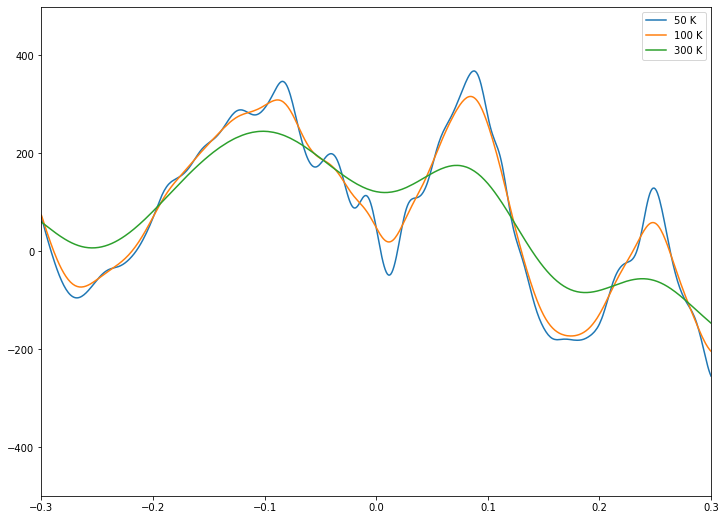

In [11]:
#sigma_yx
plt.figure(figsize=(12, 9))
plt.plot(df[df["T"] == 50]["Ef"], df[df["T"] == 50]["sigma"], label="50 K")
plt.plot(df[df["T"] == 100]["Ef"], df[df["T"] == 100]["sigma"], label="100 K")
plt.plot(df[df["T"] == 300]["Ef"], df[df["T"] == 300]["sigma"], label="300 K")
plt.xlim(-0.3, 0.3)
plt.ylim(-500, 500)
plt.legend()
plt.show()

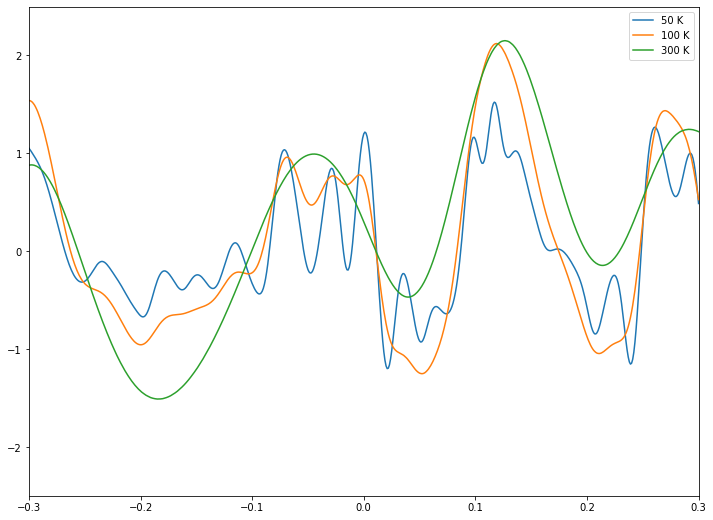

In [8]:
#alpha_yx
plt.figure(figsize=(12, 9))
plt.plot(df[df["T"] == 50]["Ef"], df[df["T"] == 50]["alpha"] * 100, label="50 K")
plt.plot(df[df["T"] == 100]["Ef"], df[df["T"] == 100]["alpha"] * 100, label="100 K")
plt.plot(df[df["T"] == 300]["Ef"], df[df["T"] == 300]["alpha"] * 100, label="300 K")
plt.xlim(-0.3, 0.3)
plt.ylim(-2.5, 2.5)
plt.legend()
plt.show()

In [47]:
temp_conv = 1

In [48]:
def plotByParamSigma(Ef):
    match_df = df[df["Ef"] == Ef]
    plt.plot(match_df["T"], match_df["sigma"])
    temp_exp_conv = np.array(sigma_yx[0]) / temp_conv
    plt.plot(temp_exp_conv, sigma_yx[1], "o")
    plt.xlim(0, 400)
    plt.ylim(-500, 500)
    plt.show()

In [49]:
def plotByParamAlpha(Ef):
    match_df = df[df["Ef"] == Ef]
    plt.plot(match_df["T"], match_df["alpha"] * 100)
    temp_exp_conv = np.array(alpha_yx[0]) / temp_conv
    plt.plot(temp_exp_conv, alpha_yx[1], "o")
    plt.xlim(0, 400)
    plt.ylim(-0.5, 0.5)
    plt.show()

In [59]:
def plotByParamAlphaovT(Ef):
    match_df = df[df["Ef"] == Ef]
    plt.plot(match_df["T"], match_df["alpha/T"] * 100)
    temp_exp_conv = np.array(alpha_yx[0]) / temp_conv
    alphaovt = np.array(alpha_yx[1]) / temp_exp_conv
    plt.plot(temp_exp_conv, alphaovt, "o")
    plt.xlim(50, 500)
    plt.xscale("log")
    plt.ylim(-0.01, 0.01)
    plt.show()

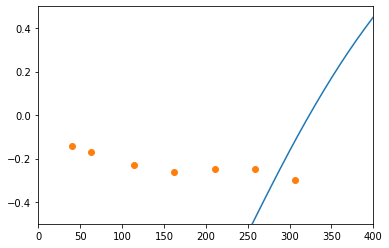

In [51]:
plotByParamAlpha(0.06)

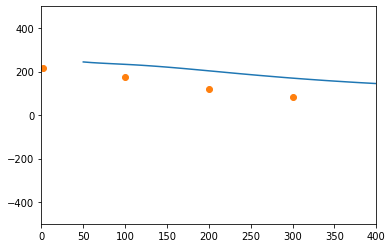

In [52]:
plotByParamSigma(0.06)

In [65]:
interact(plotByParamSigma, Ef=FloatSlider(min=-0.1, max=0.1, step=0.001, readout_format='.4f'))

interactive(children=(FloatSlider(value=0.0, description='Ef', max=0.1, min=-0.1, readout_format='.4f', step=0…

<function __main__.plotByParamSigma(Ef)>

In [66]:
interact(plotByParamAlpha, Ef=FloatSlider(min=-0.1, max=0.1, step=0.001, readout_format='.4f'))

interactive(children=(FloatSlider(value=0.0, description='Ef', max=0.1, min=-0.1, readout_format='.4f', step=0…

<function __main__.plotByParamAlpha(Ef)>

In [67]:
interact(plotByParamAlphaovT, Ef=FloatSlider(min=-0.1, max=0.1, step=0.001, readout_format='.4f'))

interactive(children=(FloatSlider(value=0.0, description='Ef', max=0.1, min=-0.1, readout_format='.4f', step=0…

<function __main__.plotByParamAlphaovT(Ef)>